In [42]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Fix the typo in this import statement
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout  # Fix the typo in this import statement
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential  # Fix the typo in this import statement
from keras.layers import Dense
import keras.backend as K  # Fix the typo in this import statement
from keras.callbacks import EarlyStopping  # Fix the typo in this import statement
from keras.optimizers import Adam  # Fix the typo in this import statement
from keras.models import load_model  # Fix the typo in this import statement
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model


In [43]:
import yfinance as yf


df = yf.download("AAPL", start="2020-01-01", end="2021-01-01")

[*********************100%%**********************]  1 of 1 completed


In [44]:
#Set Target Variable
output_var = PD.DataFrame(df['Close'])
#Selecting the Features
features = ['Open','High','Low','Volume']

scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2020-01-02,0.210292,0.220719,0.254288,0.233767
2020-01-03,0.213100,0.220658,0.258322,0.262313
2020-01-06,0.202734,0.218760,0.246774,0.188763
2020-01-07,0.221399,0.221637,0.261340,0.163712
2020-01-08,0.213131,0.232474,0.260354,0.224812


In [45]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [46]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [47]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
8/8 [==============================] - 2s 3ms/step - loss: 8903.9121
Epoch 2/10
8/8 [==============================] - 0s 3ms/step - loss: 8899.4395
Epoch 3/10
8/8 [==============================] - 0s 3ms/step - loss: 8894.6133
Epoch 4/10
8/8 [==============================] - 0s 4ms/step - loss: 8889.3740
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 8883.4102
Epoch 6/10
8/8 [==============================] - 0s 2ms/step - loss: 8876.6123
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 8868.4785
Epoch 8/10
8/8 [==============================] - 0s 3ms/step - loss: 8858.7480
Epoch 9/10
8/8 [==============================] - 0s 2ms/step - loss: 8847.3643
Epoch 10/10
8/8 [==============================] - 0s 2ms/step - loss: 8834.5762


In [48]:
y_pred= lstm.predict(X_test)

1/1 [==============================] - 1s 596ms/step


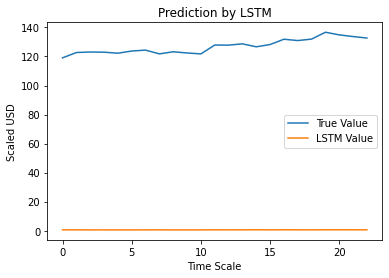

In [49]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()